In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [3]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [4]:
features_ = pd.read_csv('../upperTriCorr.csv', index_col=0).set_index('participant_id')

In [5]:
targets_ = pd.read_csv('/home/jovyan/shared/ds003097/participants.tsv', delimiter='\t').set_index('participant_id')
targets_ = targets_.loc[features_.index]
targets_ = targets_[['BAS_drive', 'BAS_fun', 'BAS_reward', 'BIS']]
targets_['score'] = targets_.sum(axis=1)

In [6]:
def get_score(n_neighbors, features, targets):
    predictions, truths = [], []
    for sub_id in features.index:
        indexer = features.index == sub_id
        X_train, y_train = features.loc[~indexer], targets.loc[~indexer]['score']
        X_test,  y_test = features.loc[indexer], targets.loc[indexer]['score']
        
        scaler = MinMaxScaler()
        y_train = scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
        y_test = scaler.transform(y_test.values.reshape(-1, 1)).ravel()
        
        regr = KNeighborsRegressor(n_neighbors=n_neighbors)
        regr.fit(X_train, y_train)
        prediction = regr.predict(X_test)
        predictions.append(prediction)
        truths.append(y_test)

    predictions = np.array(predictions).reshape(-1)
    truths = np.array(truths).reshape(-1)
    return r2_score(truths, predictions)


In [9]:
for n_neighbors in range(1, 16):
    score = get_score(n_neighbors, features_, targets_)
    print(f'n_neighbors = {n_neighbors}, r^2 = {score:.4f}')

n_neighbors = 1, r^2 = -1.0070
n_neighbors = 2, r^2 = 0.0034
n_neighbors = 3, r^2 = 0.1958
n_neighbors = 4, r^2 = 0.1490
n_neighbors = 5, r^2 = 0.0945
n_neighbors = 6, r^2 = 0.1463
n_neighbors = 7, r^2 = 0.1383
n_neighbors = 8, r^2 = 0.0724
n_neighbors = 9, r^2 = 0.0831
n_neighbors = 10, r^2 = 0.1505
n_neighbors = 11, r^2 = 0.1340
n_neighbors = 12, r^2 = 0.1209
n_neighbors = 13, r^2 = 0.1076
n_neighbors = 14, r^2 = 0.0863
n_neighbors = 15, r^2 = 0.1062


#### We will choose n_neighbors = 3

## Permutation Test

In [10]:
rng = np.random.default_rng(0)

scores = []
for _ in tqdm(range(100)):
    indexes = list(range(len(features_)))
    rng.shuffle(indexes)
    if indexes == list(range(len(features_))):
        continue
    targets = targets_.iloc[indexes]
    score = get_score(3, features_, targets)
    scores.append(score)


  0%|          | 0/100 [00:00<?, ?it/s]

(array([ 1.,  2.,  6.,  9., 11., 18., 22., 15., 12.,  4.]),
 array([-0.78530725, -0.66024016, -0.53517308, -0.410106  , -0.28503891,
        -0.15997183, -0.03490474,  0.09016234,  0.21522943,  0.34029651,
         0.46536359]),
 <BarContainer object of 10 artists>)

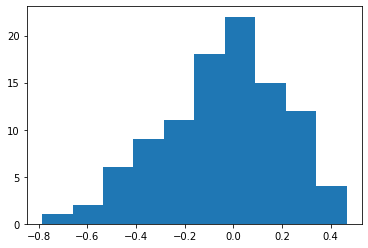

In [11]:
fig, ax = plt.subplots()
ax.hist(scores)

In [13]:
len(list(filter(lambda x: x > 0.1958, scores))) / len(scores)

0.17